In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_completeness_v_measure
%matplotlib inline

In [12]:
import numpy as np # vetores
from matplotlib import pyplot as plt # gráficos
from sklearn.cluster import KMeans # KMeans

##a) Considere que a rede possui três neurônio que corresponde a existência de três clusters nos dados. Inicialize os pesos dos neurônios (centroides) de forma aleatória

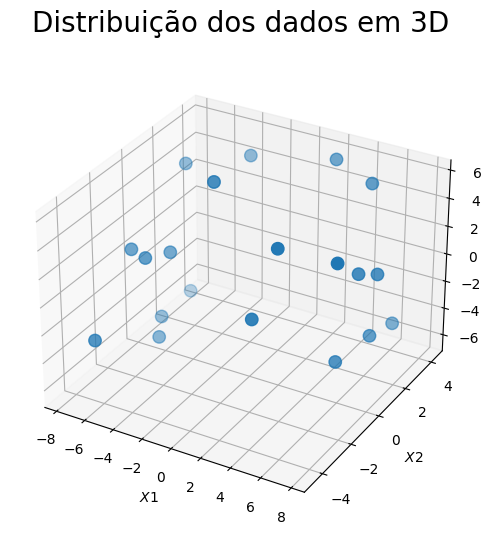

In [14]:
dataset = np.array([  # Dados fornecidos na questão
    [-5.82,-4.58,-1.97],
    [-4.68 ,2.16, 3.71],
    [-4.68, 2.16 ,3.71],
    [3.36, -3.19, 1.09],
  	[7.72 ,0.88 ,1.80],
    [-7.64 ,3.06 ,3.50],
    [-6.87 ,0.57 ,-5.45],
    [4.47 ,-2.62 ,5.76],
    [7.73 ,-2.01 ,5.18],
    [-7.71 ,3.34 ,-6.33],
    [-5.91 ,-0.49 ,-5.68],
    [2.18 ,3.81 ,5.82],
    [6.72 ,-0.93 ,-3.04],
    [-5.25 ,-0.26 ,0.56],
    [-6.94 ,-1.22 ,1.13],
    [7.09 ,0.20 ,2.25],
    [6.81 ,3.17 ,-4.15],
    [-4.19 ,4.24 ,4.04],
    [-5.38 ,-1.74 ,1.43],
    [5.08 ,3.30 ,5.33],
    [7.27 ,0.93 ,-2.78]
])

x1 = list()
x2 = list()
x3 = list()

for i in dataset:
  x1.append(i[0])
for i in dataset:
  x2.append(i[1])
for i in dataset:
  x3.append(i[2])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, x3, s=80)
plt.title('Distribuição dos dados em 3D', pad=20, size=20)
ax.set_xlabel('$X1$', fontsize=10)
ax.set_ylabel('$X2$', fontsize=10)
ax.set_zlabel('$X3$', fontsize=10)
plt.show()

In [15]:
kmeans = KMeans(  # inicializando de forma randômica os centróides
         init='random',
         n_clusters=3,
         n_init=10,
         max_iter=100,
         random_state=33
)

kmeans.fit(dataset) #treino com o conjunto de dados
kmeans.cluster_centers_
kmeans.labels_

array([2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
      dtype=int32)

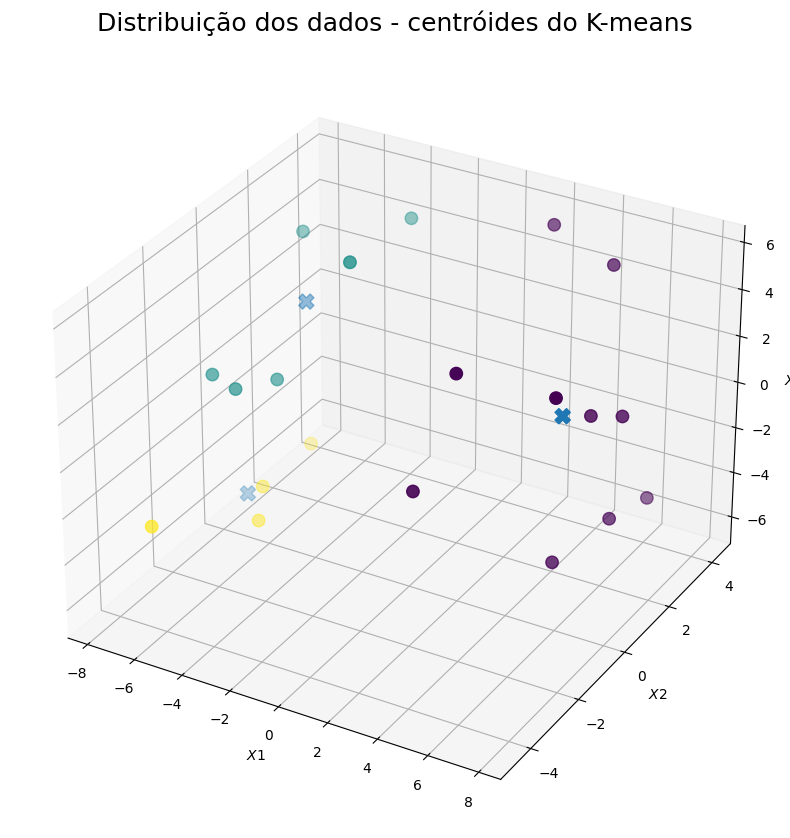

In [16]:
centroides = kmeans.cluster_centers_
labels = kmeans.labels_

x_cent = [centroides[0][0], centroides[1][0], centroides[2][0]]
y_cent = [centroides[0][1], centroides[1][1], centroides[2][1]]
z_cent = [centroides[0][2], centroides[1][2], centroides[2][2]]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, x3, s=80, c=labels)
ax.scatter(x_cent, y_cent, z_cent, s=120, marker='X')
plt.title('Distribuição dos dados - centróides do K-means', pad=20, size=18)
ax.set_xlabel('$X1$', fontsize=10)
ax.set_ylabel('$X2$', fontsize=10)
ax.set_zlabel('$X3$', fontsize=10)

plt.show()

In [17]:
kmeans = KMeans(
         init='random',
         n_clusters=3,
         n_init=10,
         max_iter=100,
         random_state=33
)

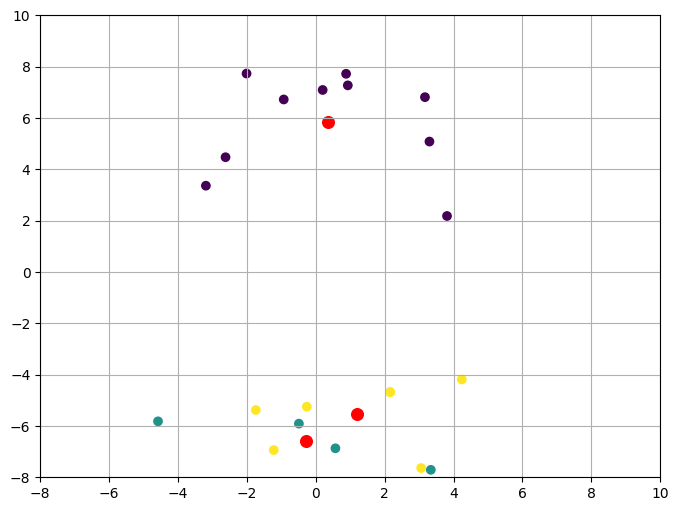

In [18]:
kmeans = KMeans(n_clusters = 3, #numero de clusters
init = 'k-means++', n_init = 100, #algoritmo que define a posição dos clusters de maneira mais assertiva
max_iter = 300) #numero máximo de iterações
pred_y = kmeans.fit_predict(dataset)
plt.figure(figsize=(8,6))
plt.scatter(dataset[:,1], dataset[:,0], c = pred_y) #posicionamento dos eixos x e y
plt.xlim(-8, 10) #range do eixo x
plt.ylim(-8, 10) #range do eixo y
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()

##b) Considere que existam três clusters e a inicialização dos centros seja dada por m1=(0,0,0)t, m2=(1,1,1)t, m3=(-1,0,2)t


In [10]:
cluster_center =  np.array([[0,0,0], [1,1,1], [-1,0,2]])
cluster_center.shape[0] == 3
cluster_center.shape[1] == dataset.shape[1]

kmeans_b = KMeans(
    init=cluster_center,
    n_clusters=3,
    n_init=10,
    max_iter=200,
    random_state=30
)

kmeans_b.fit(dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init=array([[ 0,  0,  0],
       [ 1,  1,  1],
       [-1,  0,  2]]),
       max_iter=200, n_clusters=3, n_init=10, random_state=30)

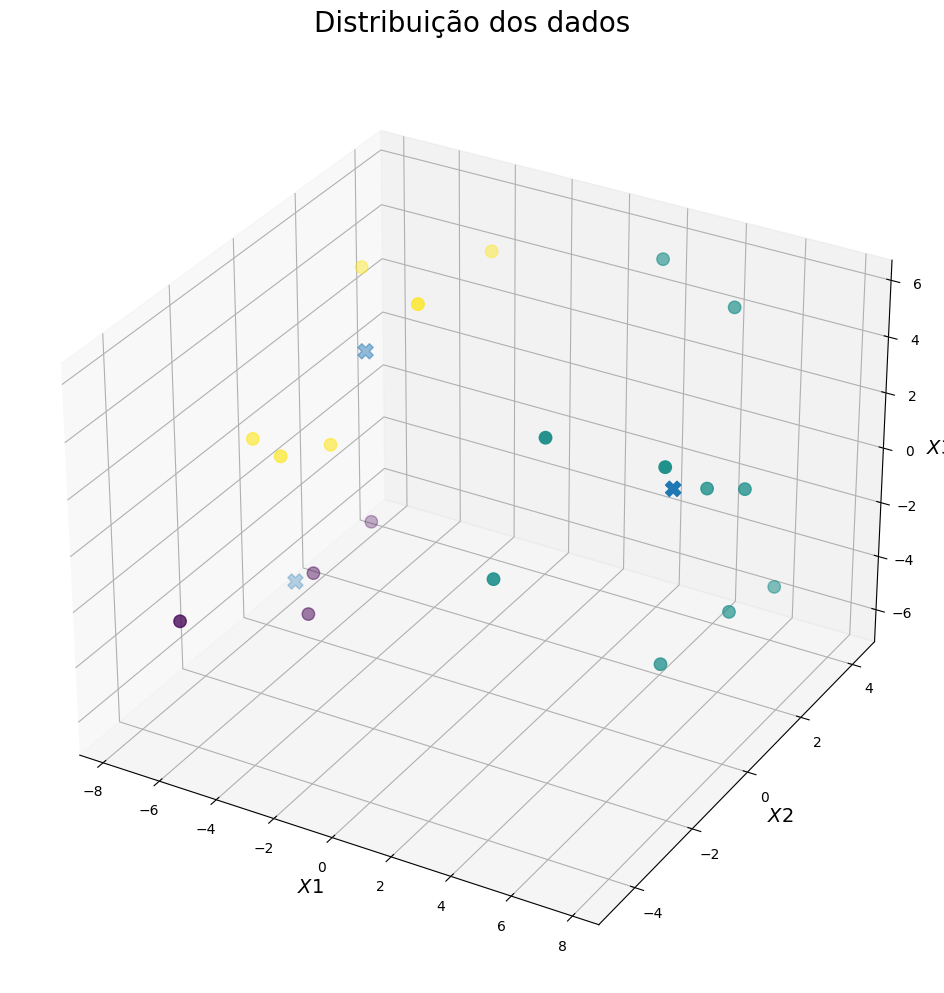

In [21]:
centroides = kmeans_b.cluster_centers_
labels = kmeans_b.labels_

x_cent = [centroides[0][0], centroides[1][0], centroides[2][0]]
y_cent = [centroides[0][1], centroides[1][1], centroides[2][1]]
z_cent = [centroides[0][2], centroides[1][2], centroides[2][2]]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, x3, s=80, c=labels)
ax.scatter(x_cent, y_cent, z_cent, s=120, marker='X')
plt.title('Distribuição dos dados', pad=20, size=20)
ax.set_xlabel('$X1$', fontsize=14)
ax.set_ylabel('$X2$', fontsize=14)
ax.set_zlabel('$X3$', fontsize=14)

plt.show()